# Clustering

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, cdist

In [6]:
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

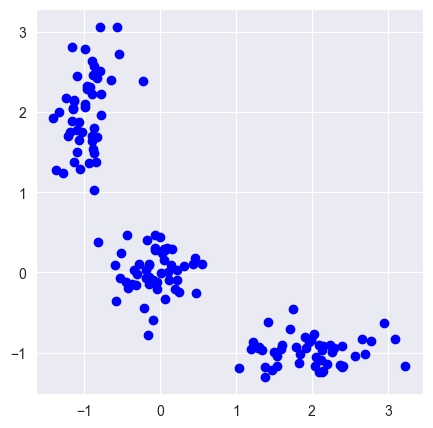

In [7]:
plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo')

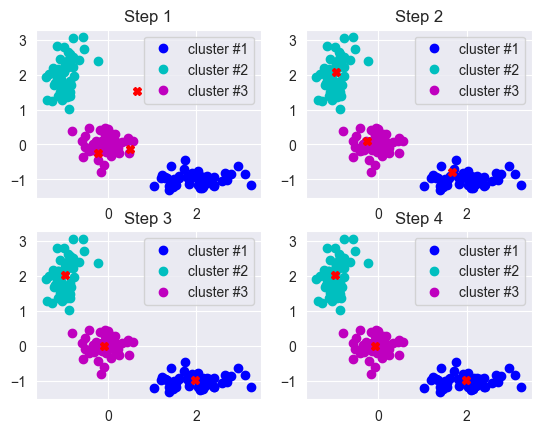

In [8]:
#Note: First, we find the central points in each cluster.
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):

    #Note: Calculate the distance from a point to a centroid
    distances = cdist(X, centroids)

    #Note: Check what's the closest centroid for each point
    labels = distances.argmin(axis=1)

    #Note: Label the point according the point's distance
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)

    cent_history.append(centroids)

for i in range(4):
   plt.subplot(2, 2, i + 1)
   plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
   plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
   plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')

   plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
   plt.legend(loc=0)

   plt.title('Step {:}'.format(i + 1))

In [9]:
#Note: We can choose the number of clusters for K-means in this manner.

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, '$J(C_k)$')

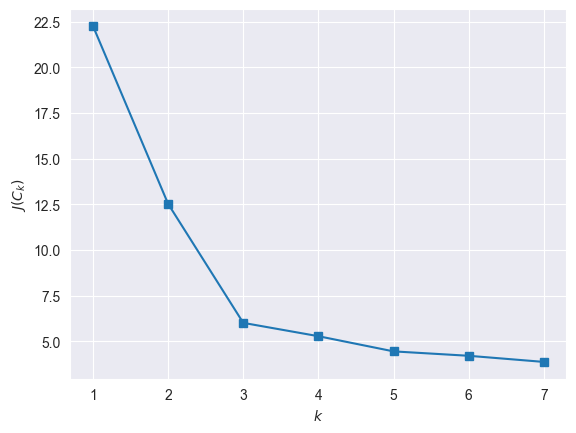

In [10]:
plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

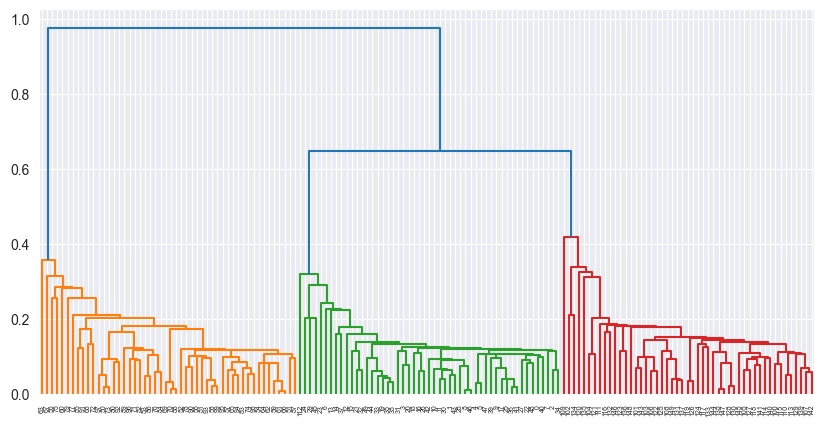

In [11]:
#Note: pdist will calculate the upper triangle of the pairwise distance matrix.
distance_mat = pdist(X)

#Note: linkage is an implementation of the agglomerative algorithm.
Z = hierarchy.linkage(distance_mat, 'single')

plt.figure(figsize=(10, 5))

dn = hierarchy.dendrogram(Z, color_threshold=0.5)

In [12]:
data = datasets.load_digits()
X, y = data.data, data.target

In [13]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [15]:
algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=10, random_state=1, affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=10))
algorithms.append(DBSCAN())

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_, average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity','Completeness', 'V-measure'], index=['K-means', 'Affinity', 'Spectral', 'Agglomerative','DBSCAN'])

results

,ARI,AMI,Homogenity,Completeness,V-measure
K-means,0.666618,0.741068,0.741543,0.745751,0.743641
Affinity,0.174985,0.612399,0.958901,0.486837,0.645800
Spectral,0.756461,0.852040,0.831691,0.876614,0.853562
Agglomerative,0.794003,0.866832,0.857513,0.879096,0.868170
DBSCAN,0.000000,0.000000,0.000000,1.000000,0.000000


## Real estate dataset

In [18]:
real_estate = pd.read_csv("/Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/AuditoryExercises/Datasets/real_estate_dataset_mk_missing.csv")
real_estate.head()

,city,area_sq_meters,num_rooms,floor,year_built,distance_from_center_km,price
0,NaN,80.0,4.0,5.0,2009.0,3.55,150804.0
1,Skopje,92.1,5.0,3.0,2008.0,3.54,178480.0
2,Skopje,97.4,5.0,0.0,2002.0,2.41,168418.0
3,Skopje,49.5,3.0,5.0,2024.0,3.97,90170.0
4,Skopje,NaN,3.0,2.0,NaN,3.75,77454.0


In [19]:
num_cols = [
    "area_sq_meters",
    "num_rooms",
    "floor",
    "year_built",
    "distance_from_center_km",
    "price",
]

# Drop rows with missing values in these columns (simple choice for now)
re_numeric = real_estate[num_cols].dropna()

print(re_numeric.shape)
re_numeric.head()

(748, 6)


,area_sq_meters,num_rooms,floor,year_built,distance_from_center_km,price
0,80.0,4.0,5.0,2009.0,3.55,150804.0
1,92.1,5.0,3.0,2008.0,3.54,178480.0
2,97.4,5.0,0.0,2002.0,2.41,168418.0
3,49.5,3.0,5.0,2024.0,3.97,90170.0
5,80.0,5.0,1.0,2000.0,1.97,130837.0


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(re_numeric)

In [21]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance by PC1+PC2:",
      pca.explained_variance_ratio_.sum().round(3))

Explained variance by PC1+PC2: 0.597


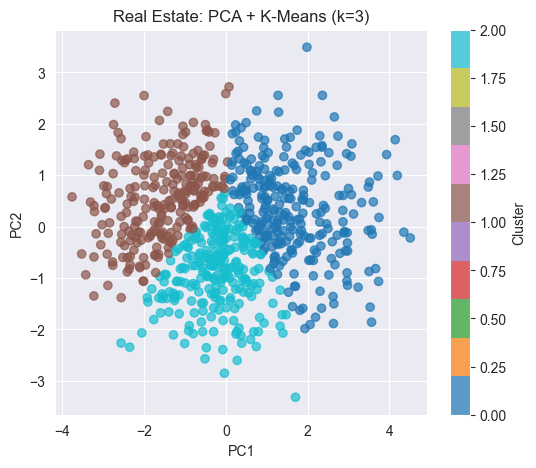

In [39]:
kmeans_re = KMeans(n_clusters=3, random_state=42, n_init="auto")
re_clusters = kmeans_re.fit_predict(X_pca)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=re_clusters,
    cmap="tab10",
    alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Real Estate: PCA + K-Means (k=3)")
plt.colorbar(scatter, label="Cluster")
plt.show()

In [26]:
re_numeric_with_cluster = re_numeric.copy()
re_numeric_with_cluster["cluster"] = re_clusters

re_numeric_with_cluster.groupby("cluster").mean().round(1)

,area_sq_meters,num_rooms,floor,year_built,distance_from_center_km,price
cluster,,,,,,
0,94.4,4.9,3.0,2006.4,3.2,135044.0
1,51.4,2.4,3.6,2004.5,2.9,59654.5
2,69.5,3.5,1.6,2003.8,4.7,86040.2


In [35]:
inertia = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, '$J(C_k)$')

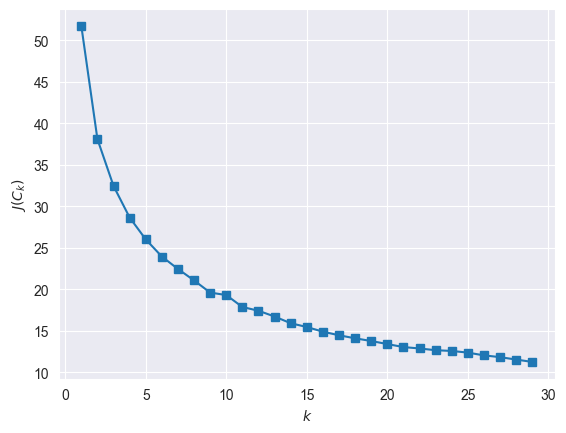

In [36]:
plt.plot(range(1, 30), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

# Loan Data Dataset

In [45]:
loan = pd.read_csv("/Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/AuditoryExercises/Datasets/loan_data_exam.csv")
loan.sample(10)

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
6546,14420,25.0,female,Bachelor,128189.0,7,MORTGAGE,12000.0,DEBTCONSOLIDATION,6.54,0.09,2.0,650.0,No,0.0
8418,29207,36.0,male,Bachelor,102076.0,13,RENT,25000.0,EDUCATION,12.87,0.24,11.0,617.0,Yes,0.0
120,25813,NaN,male,High School,94535.0,9,MORTGAGE,20000.0,HOMEIMPROVEMENT,14.26,0.21,10.0,NaN,No,1.0
4014,43168,26.0,male,Bachelor,69873.0,3,MORTGAGE,25000.0,MEDICAL,12.75,0.36,6.0,691.0,No,1.0
5276,1433,25.0,male,Bachelor,42758.0,4,RENT,1100.0,DEBTCONSOLIDATION,6.76,0.03,2.0,651.0,No,0.0
2914,5304,26.0,NaN,Associate,30998.0,3,RENT,8500.0,VENTURE,6.91,0.27,4.0,649.0,No,1.0
1166,29853,36.0,male,Doctorate,48702.0,18,MORTGAGE,4000.0,EDUCATION,18.07,0.08,14.0,NaN,Yes,0.0
4311,34799,31.0,female,Bachelor,61111.0,6,MORTGAGE,1889.0,VENTURE,7.83,0.03,9.0,NaN,Yes,0.0
3013,43133,24.0,male,Associate,17987.0,0,RENT,4027.0,DEBTCONSOLIDATION,10.76,0.22,3.0,669.0,No,NaN
6021,31744,36.0,female,NaN,78848.0,13,RENT,15000.0,MEDICAL,13.72,0.19,11.0,638.0,No,0.0


In [46]:
loan = loan.drop(columns=["Unnamed: 0"])
loan = loan.dropna()

# Separate features and label
X_loan = loan.drop(columns=["loan_status"])
y_loan = loan["loan_status"]  # 0/1 or similar

numeric_features = X_loan.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_loan.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_features, categorical_features

(['person_age',
  'person_income',
  'person_emp_exp',
  'loan_amnt',
  'loan_int_rate',
  'loan_percent_income',
  'cb_person_cred_hist_length',
  'credit_score'],
 ['person_gender',
  'person_education',
  'person_home_ownership',
  'loan_intent',
  'previous_loan_defaults_on_file'])

In [47]:
preprocess_loan = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

X_loan_pre = preprocess_loan.fit_transform(X_loan)

# If sparse, convert to dense for PCA
if hasattr(X_loan_pre, "toarray"):
    X_loan_pre = X_loan_pre.toarray()

X_loan_pre.shape

(5854, 27)

In [48]:
pca_loan = PCA(n_components=2, random_state=42)
X_loan_pca = pca_loan.fit_transform(X_loan_pre)

print("Explained variance (2 PCs):",
      pca_loan.explained_variance_ratio_.sum().round(3))

Explained variance (2 PCs): 0.411


In [49]:
kmeans_loan = KMeans(n_clusters=2, random_state=42, n_init="auto")
loan_clusters = kmeans_loan.fit_predict(X_loan_pca)

ari = adjusted_rand_score(y_loan, loan_clusters)
print("Adjusted Rand Index between clusters and loan_status:", round(ari, 3))

Adjusted Rand Index between clusters and loan_status: -0.018


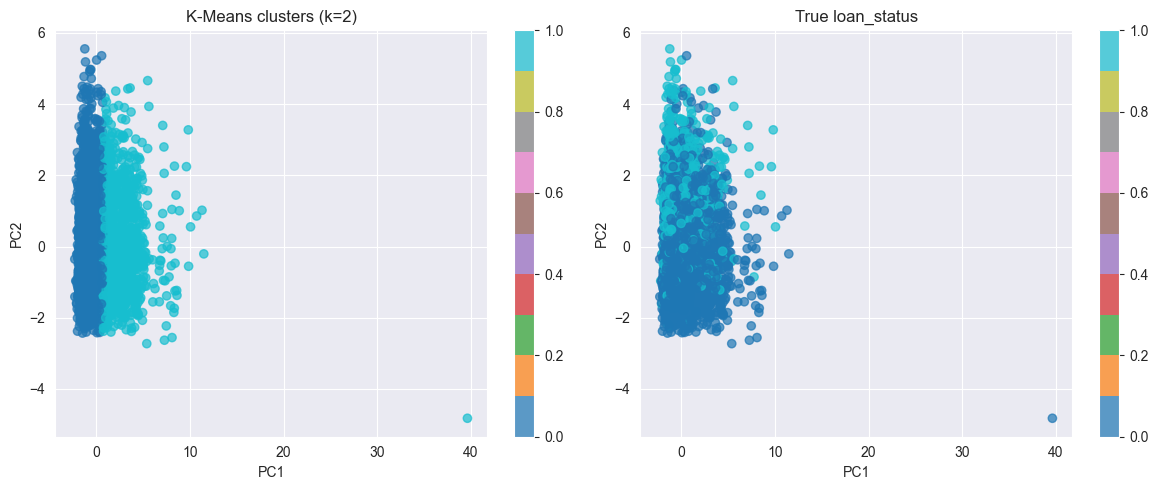

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

scatter0 = axes[0].scatter(
    X_loan_pca[:, 0], X_loan_pca[:, 1],
    c=loan_clusters, cmap="tab10", alpha=0.7
)
axes[0].set_title("K-Means clusters (k=2)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
fig.colorbar(scatter0, ax=axes[0])

scatter1 = axes[1].scatter(
    X_loan_pca[:, 0], X_loan_pca[:, 1],
    c=y_loan, cmap="tab10", alpha=0.7
)
axes[1].set_title("True loan_status")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
fig.colorbar(scatter1, ax=axes[1])

plt.tight_layout()
plt.show()